In [7]:
from dotenv import load_dotenv
import os
from tavily import TavilyClient

load_dotenv()

True

In [9]:
client = TavilyClient()

In [10]:
result = client.search("What is in Nvisia's new Blackwell GPU ?", include_answer=True)
print(result['answer'])

The Blackwell GPU features advanced tensor cores, NVLink 5.0, and confidential computing to boost AI performance. It supports up to 10 trillion parameters for models. It includes the Grace CPU Superchip for enhanced compute.


In [11]:
city = "Colombo"
query = f"What is the weather in {city} today ?"

# Regular search

In [16]:
import requests
from bs4 import BeautifulSoup
from ddgs import DDGS
import re

ddg = DDGS()

def search(query, max_results=3):
    results = ddg.text(query, max_results=max_results)
    return [i['href'] for i in results]

for i in search(query):
    print(i)

https://meteum.ai/weather/en/colombo
https://www.accuweather.com/en/lk/colombo/311399/weather-forecast/311399
https://www.timeanddate.com/weather/sri-lanka/colombo


Website: https://meteum.ai/weather/en/colombo
<!DOCTYPE html>
<html class="__className_33987e __variable_33987e" data-theme="system" dir="ltr" lang="en"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link crossorigin="anonymous" data-precedence="next" href="https://yastatic.net/s3/weather-frontend/front2/_next/static/css/7d3a08775666a43a.css" nonce="MTg1ZTY3ODMtMDU0MC00ODY0LWI1ZmYtNWIyODhlZmZmZmEx" rel="stylesheet"/><link crossorigin="anonymous" data-precedence="next" href="https://yastatic.net/s3/weather-frontend/front2/_next/static/css/4aa767752adf9188.css" nonce="MTg1ZTY3ODMtMDU0MC00ODY0LWI1ZmYtNWIyODhlZmZmZmEx" rel="stylesheet"/><link crossorigin="anonymous" data-precedence="next" href="https://yastatic.net/s3/weather-frontend/front2/_next/static/css/4cbd0bda9d5aae8e.css" nonce="MTg1ZTY3ODMtMDU0MC00ODY0LWI1ZmYtNWIyODhlZmZmZmEx" rel="stylesheet"/><link crossorigin="anonymous" data-precedence="next" href="https://yastatic.net/s3/wea
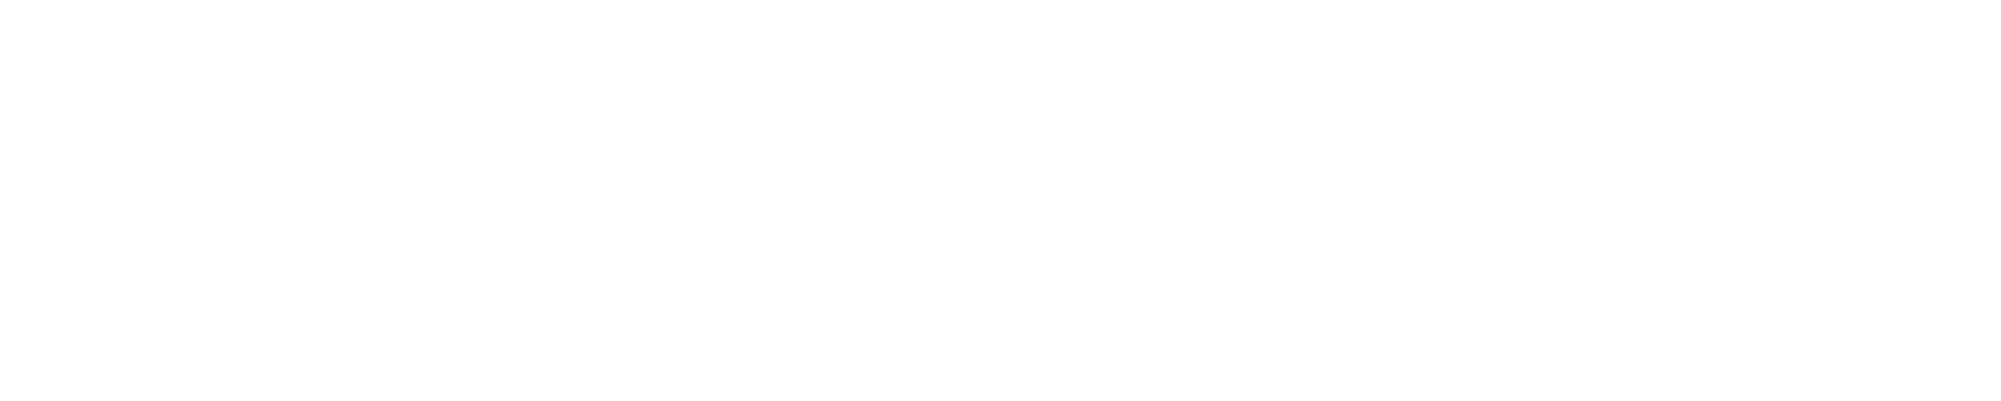
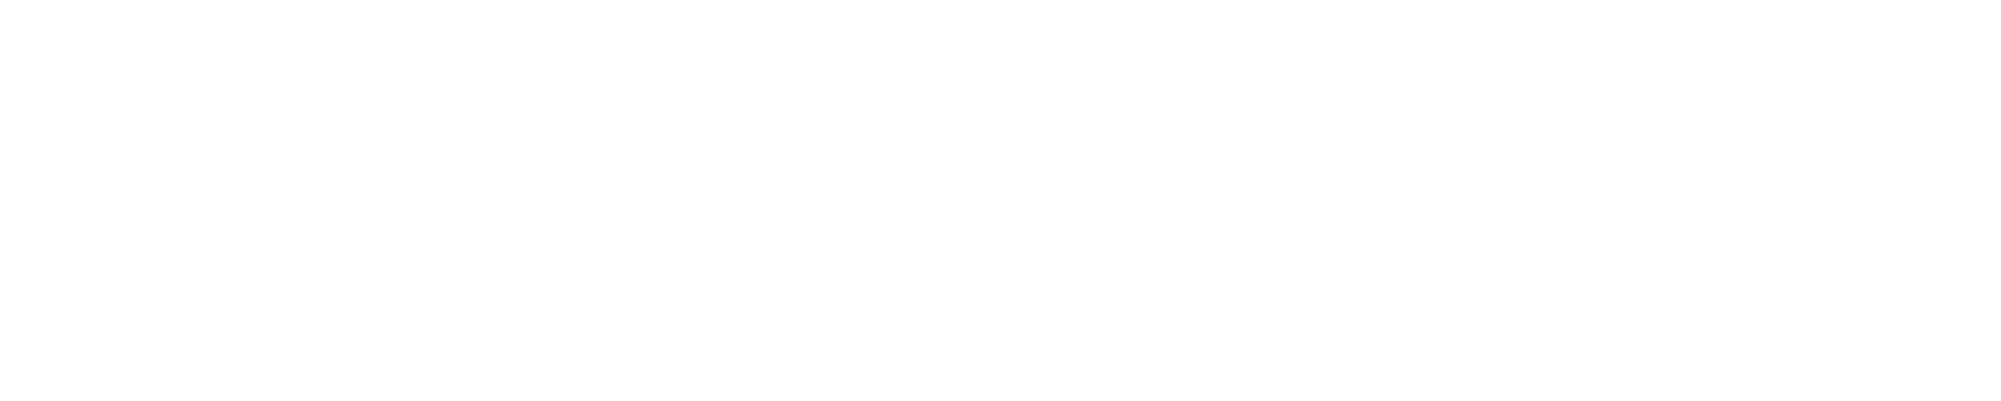

In [17]:
def scrape_weather_info(url):
    if not url:
        return "Weather information could not be found."
    
    # fetch data
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the webpage."
    
    #parse result
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

url = search(query)[0]
soup = scrape_weather_info(url)
print(f"Website: {url}")
print(soup)

In [18]:
# extract data
weather_data = []
for tag in soup.find_all(['h1', 'h2', 'h3', 'p']):
    text = tag.get_text(" ", strip=True)
    weather_data.append(text)

weather_data = "\n".join(weather_data)
weather_data = re.sub(r'\s+', ' ', weather_data)
print(f"Website: {url}")
print(weather_data)

Website: https://meteum.ai/weather/en/colombo
(Colombo, Western Province, Sri Lanka) Weather in Colombo (Colombo, Western Province, Sri Lanka) (Colombo, Western Province, Sri Lanka) Colombo, current weather: partly cloudy. Rain will start around 14⁠:⁠30. Air temperature +30°, feels like +39°. Wind speed 2 Meters per second, south-westerly. Pressure 758 millimeters of mercury. Humidity 69%. Daytime water temperature +29°. Sunrise 05:59, Sunset 18:06. This time yesterday +30° + 30 ° Partly cloudy. Rain will start around 14⁠:⁠30 What type of warnings are you interested in? Today rain will start around 14⁠:⁠30 · +26⁠…⁠+30⁠° · light winds at 3⁠–⁠5 m⁠/⁠s with gusts up to 12 m⁠/⁠s Weather forecast for today: rain will start around 14⁠:⁠30 · +26⁠…⁠+30⁠° · light winds at 3⁠–⁠5 m⁠/⁠s with gusts up to 12 m⁠/⁠s Tomorrow light rain · +27⁠…⁠+31⁠° · light winds at 4⁠–⁠5 m⁠/⁠s with gusts up to 13 m⁠/⁠s Weather forecast for tomorrow: light rain · +27⁠…⁠+31⁠° · light winds at 4⁠–⁠5 m⁠/⁠s with gusts up t

# Agentic search tool

In [20]:
result = client.search(query, max_results=1)

data = result["results"][0]["content"]
print(data)

{'location': {'name': 'Colombo', 'region': 'Western', 'country': 'Sri Lanka', 'lat': 6.9319, 'lon': 79.8478, 'tz_id': 'Asia/Colombo', 'localtime_epoch': 1758525718, 'localtime': '2025-09-22 12:51'}, 'current': {'last_updated_epoch': 1758525300, 'last_updated': '2025-09-22 12:45', 'temp_c': 30.1, 'temp_f': 86.2, 'is_day': 1, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}, 'wind_mph': 14.5, 'wind_kph': 23.4, 'wind_degree': 230, 'wind_dir': 'SW', 'pressure_mb': 1010.0, 'pressure_in': 29.83, 'precip_mm': 0.58, 'precip_in': 0.02, 'humidity': 84, 'cloud': 50, 'feelslike_c': 37.5, 'feelslike_f': 99.5, 'windchill_c': 27.8, 'windchill_f': 82.1, 'heatindex_c': 31.9, 'heatindex_f': 89.5, 'dewpoint_c': 24.0, 'dewpoint_f': 75.3, 'vis_km': 10.0, 'vis_miles': 6.0, 'uv': 13.6, 'gust_mph': 18.6, 'gust_kph': 30.0}}


In [21]:
import json
from pygments import highlight, lexers, formatters

parsed_json = json.loads(data.replace("'", '"'))

formatted_json = json.dumps(parsed_json, indent=4)
colorful_json = highlight(formatted_json, lexers.JsonLexer(), formatters.TerminalFormatter())

print(colorful_json)

{
    "location": {
        "name": "Colombo",
        "region": "Western",
        "country": "Sri Lanka",
        "lat": 6.9319,
        "lon": 79.8478,
        "tz_id": "Asia/Colombo",
        "localtime_epoch": 1758525718,
        "localtime": "2025-09-22 12:51"
    },
    "current": {
        "last_updated_epoch": 1758525300,
        "last_updated": "2025-09-22 12:45",
        "temp_c": 30.1,
        "temp_f": 86.2,
        "is_day": 1,
        "condition": {
            "text": "Partly cloudy",
            "icon": "//cdn.weatherapi.com/weather/64x64/day/116.png",
            "code": 1003
        },
        "wind_mph": 14.5,
        "wind_kph": 23.4,
        "wind_degree": 230,
        "wind_dir": "SW",
        "pressure_mb": 1010.0,
        "pressure_in": 29.83,
        "precip_mm": 0.58,
        "precip_in": 0.02,
        "humidity": 84,
        "cloud": 50,
        "feelslike_c": 37.5,
        "feelslike_f": 99.5,
        "windchill_c": 27.8,
        "windchill_f": 82.1,
      